# Práctico 1: Aprendizaje por refuerzos

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2019

Se trabaja con The Cliff.

![](images/cliffwalking.png)

donde S= starting point, G= goal.

Descripción del entorno:

Acciones:

    ^ - Arriba 
    v - Abajo
    > - Derecha
    < - Izquierda

Función de recompensa:

$-1$ en todos los demás estados
$-100$ en el acantilado
Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

Primero, importamos:

In [1]:
import matplotlib.pyplot as plt
import itertools
import gym
import numpy as np
from agents.utils.plotting import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

# Actividad 1: SARSA

In [2]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    # estado accion valor
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

In [3]:
def learn(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """
    oldQ = q.get((state, action), 0.0)
    newQ = q.get((next_state, next_action), 0.0)
    q[state, action] = oldQ + alpha*(reward + gamma* newQ - oldQ)
    
    pass

In [4]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        #aca llamar el choose action 
        # también cambiar el next action
        #abajo compoear el learning
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [5]:
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.2
tau = 25
episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [6]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

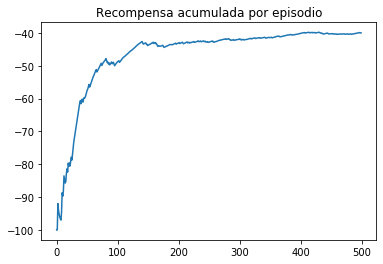

In [7]:
plot_reward_per_episode(reward_ep)

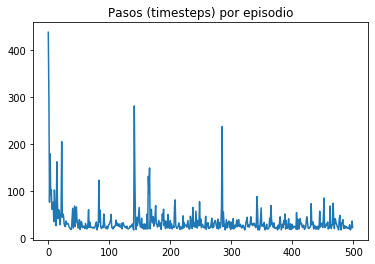

In [8]:
plot_steps_per_episode(timesteps_ep)

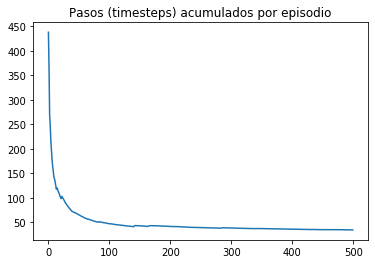

In [9]:
plot_steps_per_episode_smooth(timesteps_ep)

#### Análisis de matriz de acción-valor y política óptima

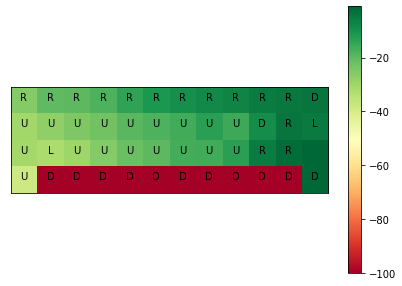


 Matriz de mejor acción-valor (en números): 

 [[ -25.60615354  -19.97214063  -19.66223884  -17.97287785  -13.82427874
   -11.11515525   -9.27791057   -8.04581475   -6.80688523   -5.44535949
    -4.48421297   -4.00166729]
 [ -30.29422598  -27.53339416  -24.85469959  -22.69018628  -19.22919002
   -17.78866218  -16.18070153  -13.27302364  -15.4192805    -8.82854097
    -3.81737445   -4.8938518 ]
 [ -30.48636996  -31.99689014  -29.78582136  -25.72153721  -21.52842532
   -19.6537621   -16.49301587  -16.246924    -13.37452953   -5.41073079
    -2.46435349   -1.        ]
 [ -38.44338637 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [10]:
draw_value_matrix(q)

In [11]:
env.close()

# Actividad 2: Q learning

In [12]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    # estado accion valor
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

In [13]:
def learn(state, action, reward, next_state):
    """
    Performs a QQ update for a given state transition
    """
    oldQ = q.get((state, action), 0.0)
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    max_q = max(q_values)
    newQ = max_q
    q[state, action] = oldQ + alpha*(reward + gamma* newQ - oldQ)
    # TODO - your code goes here
    
    pass

In [14]:
#s={}
#s[1,"action"]=1
#s[2,"action"]=1
#s.get(("action"))


In [15]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        #action = choose_action(state)
        #aca llamar el choose action 
        # también cambiar el next action
        #abajo compoear el learning
        
        while not done:

            # Execute the action and get feedback
            action = choose_action(state)
            next_state, reward, done, info = env.step(action)
            
            
            

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn(state, action, reward, next_state)
                state = next_state
                #action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn(state, action, reward, next_state)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [16]:
q = {}

# definimos sus híper-parámetros básicos

#lineas comentadas, para usar los mismos hiperparámetros que en el algoritmo SARSA y comparar 
# directamente se definen los hiperparámetros en el agoritmo SARSA y luego q lerning se ejecuta
# con los mismos valores
#alpha = 0.6
#gamma = 1
#epsilon = 0.3
#tau = 25
#episodes_to_run = 1000

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [17]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos curvas:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente sumando cada una de recompensas individuales de cada episodio. Con esta medida podremos tener una noción de cómo se desempeñó esquivando el acantilado y llegando lo antes posible a la meta.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio.

Se estila suavizar ambas curvas para apreciar mejor su progresión (aunque a veces suele analizarse la curva de pasos por episodio sin suavizar).

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $-1$ excepto al caer al acantilado, donde la recompensa es de $-100$)

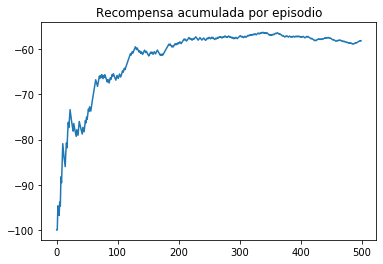

In [18]:
plot_reward_per_episode(reward_ep)

Veamos pasos por episodio

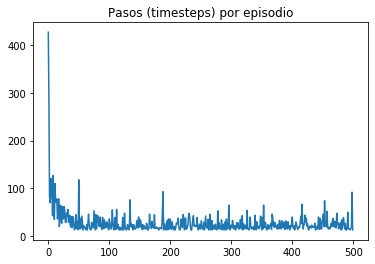

In [19]:
plot_steps_per_episode(timesteps_ep)

Suavizando...

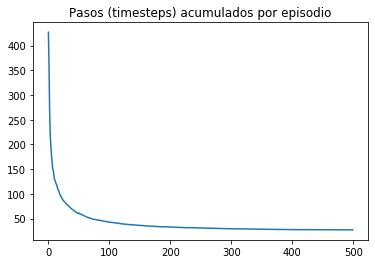

In [20]:
plot_steps_per_episode_smooth(timesteps_ep)

#### Análisis de matriz de acción-valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor de la función $Q(s,a)$ para la mejor acción de cada estado, al finalizar el entrenamiento del agente, (sería la acción que el agente ejecutaría en cada estado bajo una política *greedy*). Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Tener en cuenta que este análisis se hace principalmente con fines educativos, para entornos más complejos el mismo puede no ser factible. En tales casos, un análisis alternativo podría consistir en hacer que el agente ejecute su política para la que fue entrenado, para hacer una evaluación a partir del comportamiento del mismo (esto último sería el *test de la política*, frente al *entrenamiento de la política* previo).

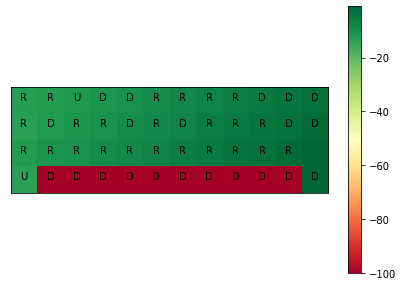


 Matriz de mejor acción-valor (en números): 

 [[ -12.72318473  -12.3205249   -11.58325018  -10.82335277   -9.89716369
    -8.93740545   -7.95246501   -6.96786682   -5.97901571   -4.99063695
    -3.9970989    -2.99999455]
 [ -12.99998564  -11.99999994  -10.99999999  -10.           -9.
    -8.           -7.           -6.           -5.           -4.
    -3.           -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [21]:
draw_value_matrix(q)

In [22]:
env.close()

## Comparación de SARSA con Q learning

Para comparar los algoritmos se fijaron valores comunes de los hiperparámetros, a saber: alpha = 0.6; gamma = 1; epsilon = 0.3; tau = 25 y episodes_to_run = 1000. 

Recompensa acumulada por episodio: en SARSA converge suavemente a aproximadamente  -60; en Q learning converge rápidamente a -70. O sea que Q learning esta llegando en las 1000 iteraciones a un reultado peor, pero lo hace mas rápidamente.

Pasos por episodio: en ambos casos convergen a aproximadamente 50, aunque aparentemente Q learning lo hace mas rápidamente.

Análisis de matriz de acción-valor y política óptima: SARSA tiende a ser mas precavido. Al menos bajo los hiperparámetros usados, la matriz de acción valor de SARSA está recomendando al agente que se aleje del risco, en cambio Q-learning le está indicando que lo bordee. Esto se debe a que en Q learning se intenta separar acciones de políticas.


 # Actividad 3: Experimentación con los hiperparámetros

### Epsilon 

Las modificaciones en el hiperparámetro $\epsilon$ tienen consecuencias dramáticas en ambos algoritmos. Si es fijado en cero ambos métodos encuentra la solución rápidamente. Cuanto mas grande es su valor, a los algoritmos les cuesta más encontrar el óptimo porque se dedican a explorar más el entorno. Entiendo que esto se debe fundamentalmente a que dicho entorno  es determinístico, por lo que una vez encontrada una acción optima, la misma seguirá siendo óptima, por lo que una incorporación del componente epsilon no aporta nada útil.

### Gamma

Si se fija gamma en cero, claramente empeora el desempeño del agente en ambas políticas . Esto se debe a que al ponerle peso máximo a la recompensa de corto plazo el agente se concentra en obtener recompensas instantáneas, lo que atenta contra la optimalidad global. No aprecio diferencias entre $\gamma= 1 $ y $0< \gamma<1$.

### Alpha

Si $\alpha=0$ los algoritmos no funcionan bien porque el agente no recuerda nada.
Si $\alpha=1$ los algoritmos funcionan relativamente bien, al menos en el caso con $\gamma=1$, porque el agente tiene memoria perfecta.
Si $\alpha$ asume un valor cercano a 0.5 los algoritmos funcionan mejor que en los casos extremos.
